## Probability Desnity Function (PDF) Generator

This Notebook aims at generating the PDF of signed Euclidean distance of relative performances for DmPerf-Esitmation. Methods include Heuristic Processing, Linear Regression, Decision Tree Regression, and Multi-Layer Perceptron. 

Import appropriate libraries and define paths to ground truth and prediciton data.

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data_base_dir = "../Py_Data_Res"

data_files = {
    "Heuristic Processing": os.path.join(data_base_dir, "p_Comp_L_1000.csv"),
    "Linear Regression": os.path.join(data_base_dir, "p_Linear_1000.csv"),
    "Decision Tree": os.path.join(data_base_dir, "p_Dtree_1000.csv"),
    "Multi-Layer Perceptron": os.path.join(data_base_dir, "p_MLP_L_1000.csv")
}

gtruth_file = os.path.join(data_base_dir, "y_10000.csv")

print(data_files)
print(gtruth_file)

{'Heuristic Processing': '../Py_Data_Res/p_Comp_L_1000.csv', 'Linear Regression': '../Py_Data_Res/p_Linear_1000.csv', 'Decision Tree': '../Py_Data_Res/p_Dtree_1000.csv', 'Multi-Layer Perceptron': '../Py_Data_Res/p_MLP_L_1000.csv'}
../Py_Data_Res/y_10000.csv


Gen combos

In [2]:
import itertools
import random

# List size
n = 10000 
# Generate all combinations of pairs of indices
index_pairs = list(itertools.combinations(range(n), 2))
num_pairs_to_select = len(index_pairs) // 50
index_pairs = random.sample(index_pairs, num_pairs_to_select)


# Display the number of pairs generated and the first few pairs
print(f"Number of pairs generated: {len(index_pairs)}")
print("First 10 pairs of indices:")
for pair in index_pairs[:10]:
    print(pair)

Number of pairs generated: 999900
First 10 pairs of indices:
(1945, 7260)
(3724, 8536)
(3588, 4179)
(443, 8067)
(893, 6984)
(1546, 5526)
(6817, 9989)
(6593, 9813)
(374, 4667)
(4069, 9405)


Read data from CSV files, compute the realative performance, get the distances and print them.

In [3]:
def read_csv_to_list(file_path):
    column_data = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            column_data.append(float(row[0]))
    return column_data

def get_rel_perf(d):
    res = []
    for (i, j) in index_pairs:
        res.append((d[i]-d[j])/d[i])
    return res

def get_dist(a, b):
    sign = 1 if a*b == 0 else (a*b)/abs(a*b) 
    dist = abs(a-b)
    return sign * dist

def get_dists(gtruth, pred):
    return [get_dist(t, p) for t, p in zip(gtruth, pred)]

def process_file(pth, gtruth):
    d = read_csv_to_list(pth)
    d = get_rel_perf(d)
    if gtruth is not None:
        print(pth)
        d = get_dists(gtruth, d)
    return d

gtruth = process_file(gtruth_file, None)
dists = {name: process_file(pth, gtruth) for name, pth in data_files.items()}
#print(dists)

../Py_Data_Res/p_Comp_L_1000.csv
../Py_Data_Res/p_Linear_1000.csv
../Py_Data_Res/p_Dtree_1000.csv
../Py_Data_Res/p_MLP_L_1000.csv


### Compute the estimated PDF given the array of distances. 

For this, use Kernel Density Estimation (KDE) as describe in:
https://en.wikipedia.org/wiki/Kernel_density_estimation
 
Specifically, we will use Gaussian KDE from SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html



In [4]:
def get_pdf(data):
    data = np.array(data)
    # print(data.shape, data[:10])
    kde = gaussian_kde(data)

    x_range = np.linspace(data.min()-1, data.max()+1, 1000)
    pdf_values = kde(x_range)

    # plt.plot(x_range, pdf_values, label=name)
    # plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')
    return (x_range, pdf_values)

pdfs = {}
for k, v in dists.items():
    pdfs[k] = get_pdf(v)

print("PDFs ready!")


Now that the PDF estimates are ready, we can proceed to plotting them. We will first plot them individually and then combined. 

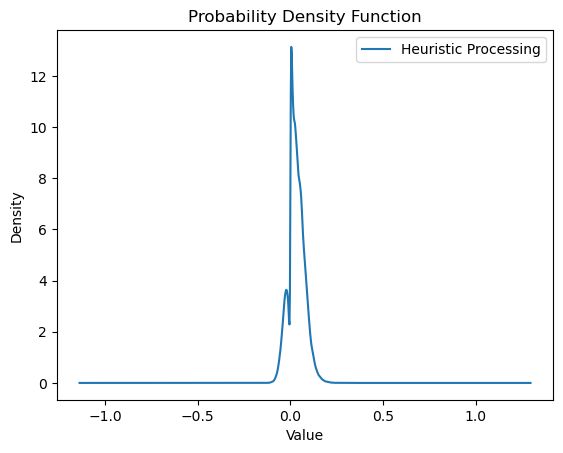

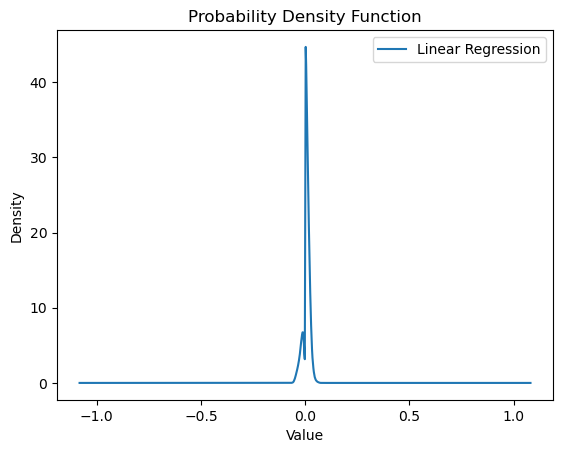

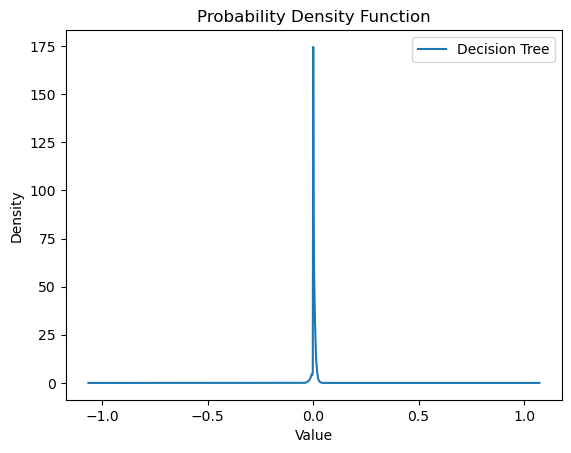

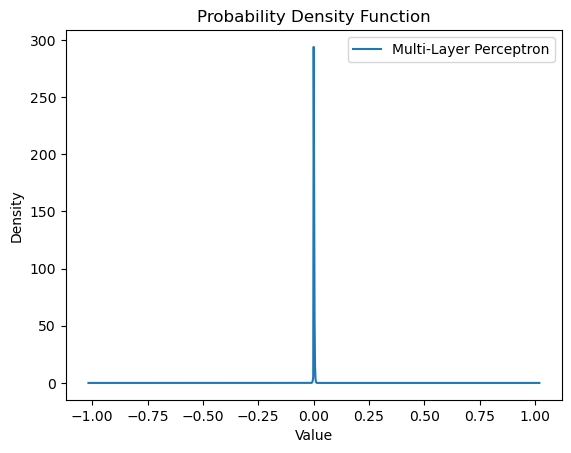

In [ ]:
for k, v in pdfs.items():
    plt.plot(v[0], v[1], label=k)
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Probability Density Function')
    plt.show()

As expected, the more accurate models result in a narrower and taller PDFs. Next, let's combine all the PDFs in one figure:

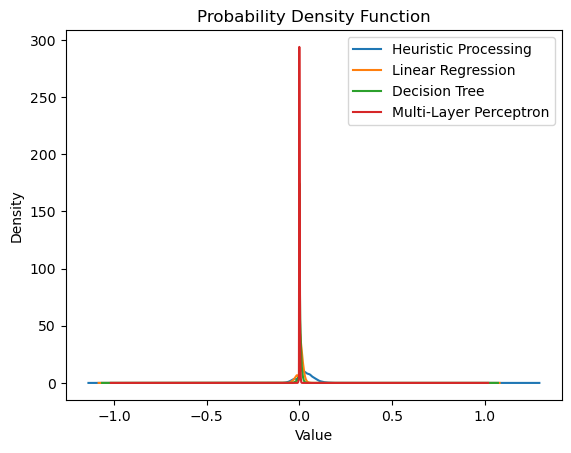

In [ ]:
for k, v in pdfs.items():
    plt.plot(v[0], v[1], label=k)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

Not so readable. Limiting the x-axis will provide a more readble figure:

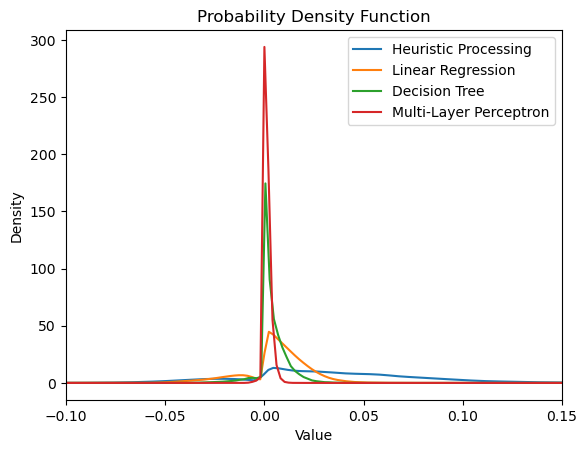

In [ ]:
for k, v in pdfs.items():
    # y_norm = v[1] / np.max(v[1])
    plt.plot(v[0], v[1], label=k)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.xlim(-0.1,0.15)
plt.show()

Exporting for use in journal paper. Setting X's range similar to paper: [-0.05 0.05]. Settig figure size to 2x2 inch. Exporting as pdf.

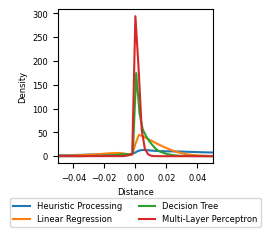

In [ ]:
plt.figure(figsize=(2, 2))  # Set figure size to 2 inch by 2 inch

# Set font size
plt.rcParams.update({'font.size': 6})


for k, v in pdfs.items():
    # y_norm = v[1] / np.max(v[1])
    plt.plot(v[0], v[1], label=k)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Density')
# plt.title('Probability Density Function')
plt.xlim(-0.05,0.05)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(fontsize=6, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.savefig('pdf_kde.pdf', format='pdf', bbox_inches='tight')

plt.show()